In [23]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN


1. Carga de datos:
- Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.
- Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.

In [4]:
data_path='../ejercicios_core/data/CC GENERAL.csv'
df = pd.read_csv(data_path)

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


2. Exploración y preprocesamiento de datos:
- Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.
- Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.
- Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.


In [5]:
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-nu

In [6]:
utils.identificar_valores_faltantes(df)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
MINIMUM_PAYMENTS,8637,313,3.50
CREDIT_LIMIT,8949,1,0.01
CUST_ID,8950,0,0.00
BALANCE,8950,0,0.00
PRC_FULL_PAYMENT,8950,0,0.00
PAYMENTS,8950,0,0.00
PURCHASES_TRX,8950,0,0.00
CASH_ADVANCE_TRX,8950,0,0.00
CASH_ADVANCE_FREQUENCY,8950,0,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950,0,0.00


In [9]:
##fillna de minimum payment con la media
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
utils.identificar_valores_faltantes(df)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
CUST_ID,8950,0,0.0
BALANCE,8950,0,0.0
PRC_FULL_PAYMENT,8950,0,0.0
MINIMUM_PAYMENTS,8950,0,0.0
PAYMENTS,8950,0,0.0
CREDIT_LIMIT,8950,0,0.0
PURCHASES_TRX,8950,0,0.0
CASH_ADVANCE_TRX,8950,0,0.0
CASH_ADVANCE_FREQUENCY,8950,0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950,0,0.0


In [10]:
# Características seleccionadas
features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
df_selected = df[features]

In [11]:
# Inicializa el escalador
scaler = StandardScaler()

# Estandariza las características seleccionadas
df_scaled = scaler.fit_transform(df_selected)

# Convierte el resultado a un DataFrame
import pandas as pd
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Mostrar las primeras filas del DataFrame estandarizado
print(df_scaled.head())

    BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.731989  -0.424900         -0.356934               -0.349079   
1  0.786961  -0.469552         -0.356934               -0.454576   
2  0.447135  -0.107668          0.108889               -0.454576   
3  0.049099   0.232058          0.546189               -0.454576   
4 -0.358775  -0.462063         -0.347294               -0.454576   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0     -0.466786            -0.806490                   -0.678661   
1      2.605605            -1.221758                   -0.678661   
2     -0.466786             1.269843                    2.673451   
3     -0.368653            -1.014125                   -0.399319   
4     -0.466786            -1.014125                   -0.399319   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0                         -0.707313     -0.960433 -0.528979     -3.109675e-01   
1                   

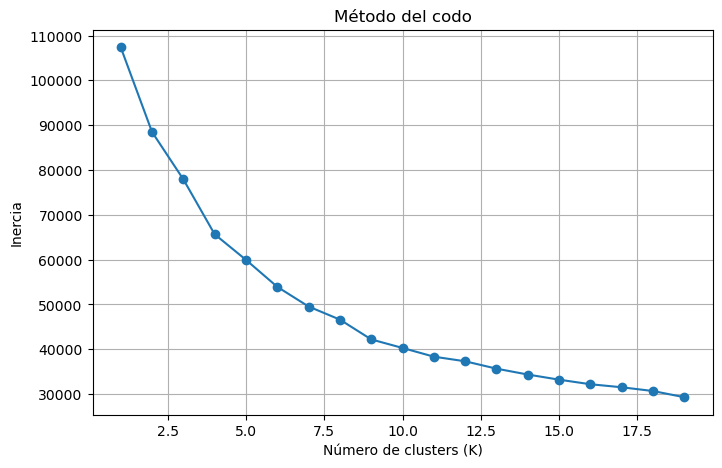

In [13]:
# Evaluación de la inercia para determinar el valor óptimo de K
inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.grid()
plt.show()

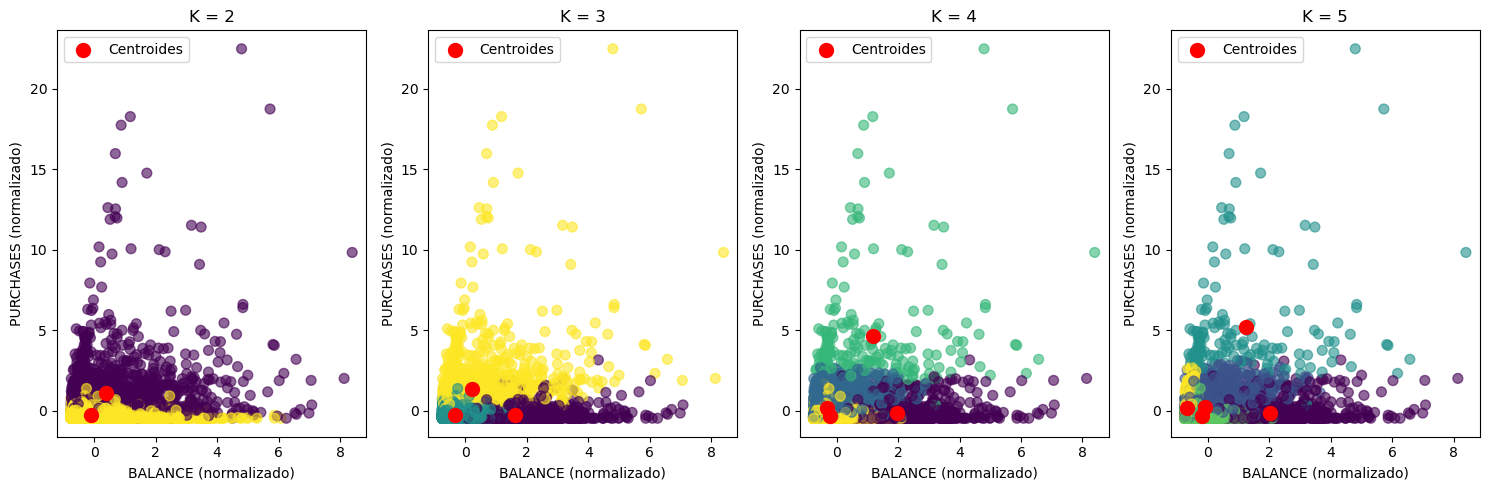

In [20]:
# Visualización de K-means con BALANCE (X) y PURCHASES (Y)
k_values = [2, 3, 4, 5]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    clusters = kmeans.predict(df_scaled)
    
    # Visualización usando BALANCE y PURCHASES
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(df_scaled['BALANCE'], df_scaled['PURCHASES'], c=clusters, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, features.index('BALANCE')], 
                kmeans.cluster_centers_[:, features.index('PURCHASES')], 
                c='red', s=100, label='Centroides')
    plt.title(f'K = {k}')
    plt.xlabel('BALANCE (normalizado)')
    plt.ylabel('PURCHASES (normalizado)')
    plt.legend()

plt.tight_layout()
plt.show()

Silhouette Score para K = 2: 0.3515
Silhouette Score para K = 3: 0.3135
Silhouette Score para K = 4: 0.2808
Silhouette Score para K = 5: 0.2918


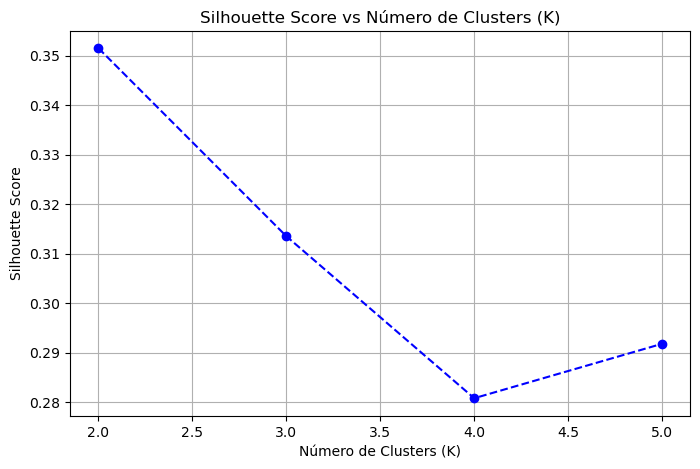

In [19]:


# Lista de valores K
k_values = [2, 3, 4, 5]
silhouette_scores = []

# Cálculo del Silhouette Score para cada K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)  # Ajusta y predice los clusters
    score = silhouette_score(df_scaled, clusters)  # Calcula el Silhouette Score
    silhouette_scores.append(score)
    print(f"Silhouette Score para K = {k}: {score:.4f}")

# Visualización de los resultados
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score vs Número de Clusters (K)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


El valor óptimo de K (número de clusters) parece ser 2, ya que presenta el Silhouette Score más alto (0.3515), indicando la mejor cohesión y separación de los clusters.

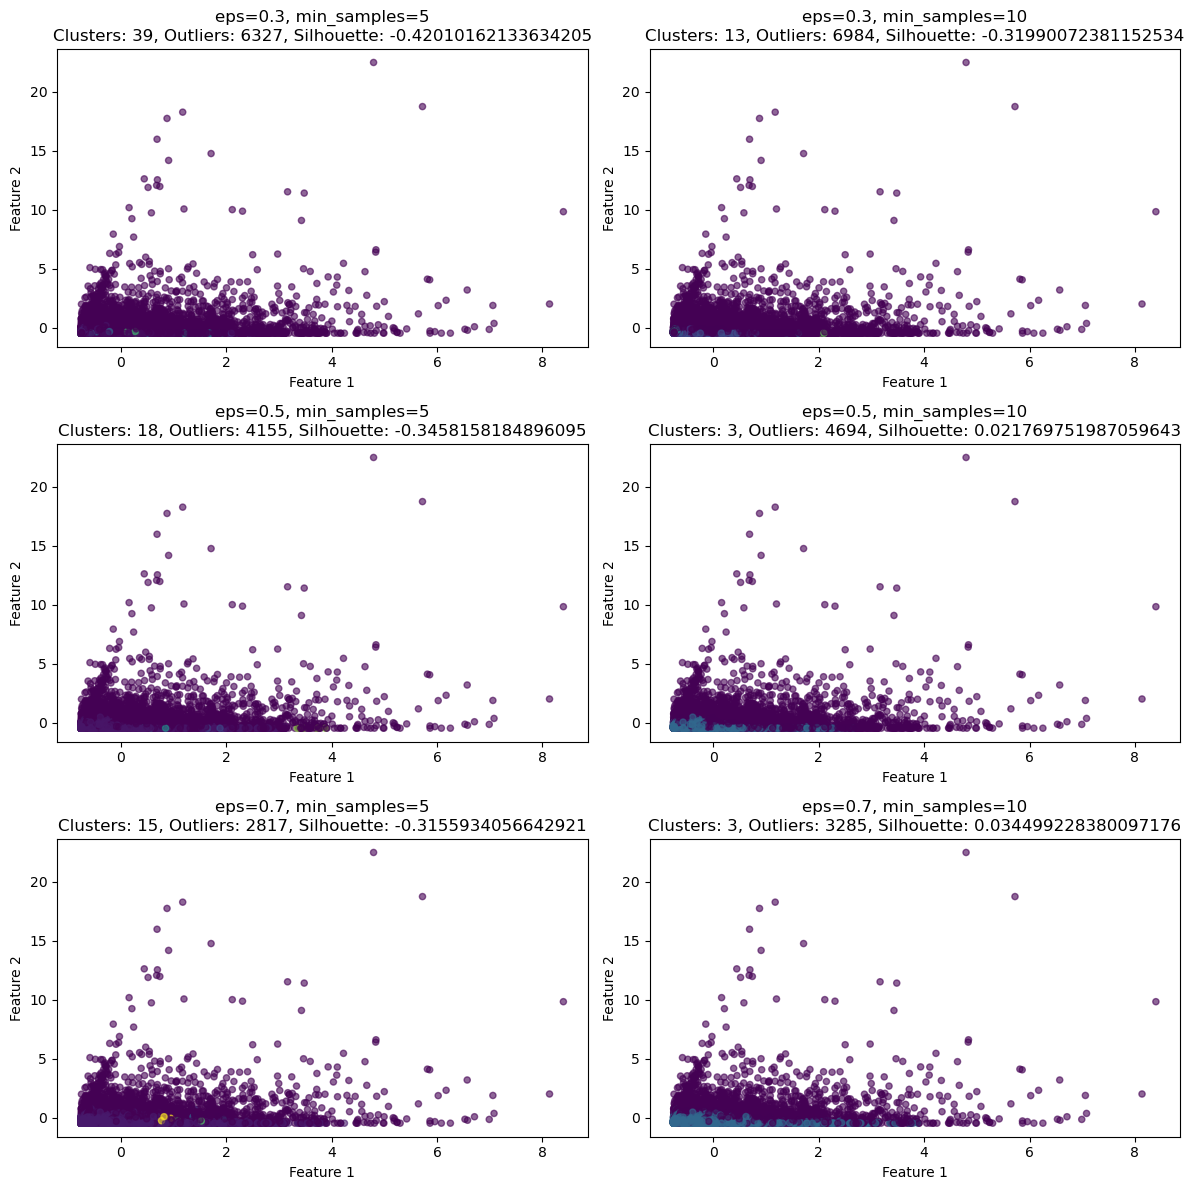

In [22]:
# Prueba diferentes valores de epsilon y min_samples
eps_values = [0.3, 0.5, 0.7]  # Distancia máxima (ajústalo según el dataset)
min_samples_values = [5, 10]  # Número mínimo de puntos en un vecindario

plt.figure(figsize=(12, len(eps_values) * 4))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)  # Ajusta y predice clusters

        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # No cuenta los outliers (-1)
        n_outliers = np.sum(clusters == -1)  # Cuenta los outliers

        # Calcula el Silhouette Score solo si hay más de 1 cluster
        if n_clusters > 1:
            sil_score = silhouette_score(df_scaled, clusters)
        else:
            sil_score = "N/A"

        # Visualización
        plt.subplot(len(eps_values), len(min_samples_values), i * len(min_samples_values) + j + 1)
        plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=clusters, cmap='viridis', s=20, alpha=0.6)
        plt.title(f"eps={eps}, min_samples={min_samples}\nClusters: {n_clusters}, Outliers: {n_outliers}, Silhouette: {sil_score}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


4. Comparación mediante métricas:
- Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:
- Silhouette Score: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.
- Calinski-Harabasz Index: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.
- Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.


### Comparación de Métricas ###
K-means:
 - Silhouette Score: 0.3135
 - Calinski-Harabasz Index: 1692.3650

DBSCAN:
 - Silhouette Score: 0.3410
 - Calinski-Harabasz Index: 43.5793


C:\Users\ENRIF\AppData\Local\Temp\ipykernel_10548\2329162017.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


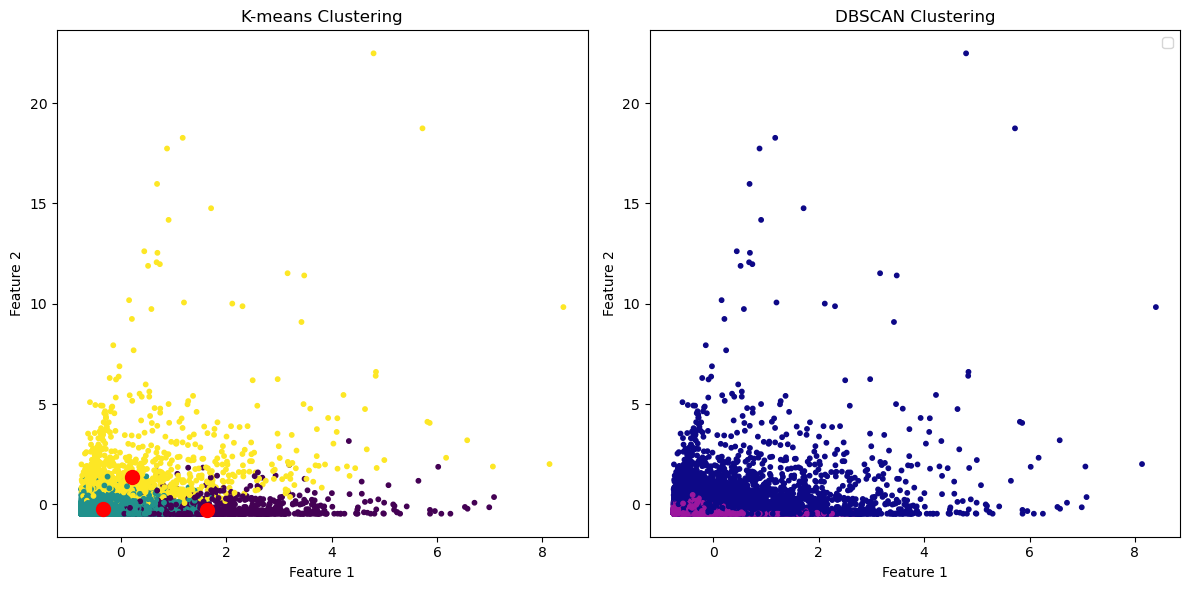

In [26]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Cálculo de métricas para K-means
silhouette_kmeans = silhouette_score(df_scaled, kmeans_clusters)
calinski_kmeans = calinski_harabasz_score(df_scaled, kmeans_clusters)

# Cálculo de métricas para DBSCAN
# Filtramos puntos que no son outliers (-1)
filtered_dbscan_clusters = dbscan_clusters[dbscan_clusters != -1]
filtered_df_scaled = df_scaled[dbscan_clusters != -1]

if len(set(filtered_dbscan_clusters)) > 1:  # Evita errores si solo hay un cluster
    silhouette_dbscan = silhouette_score(filtered_df_scaled, filtered_dbscan_clusters)
    calinski_dbscan = calinski_harabasz_score(filtered_df_scaled, filtered_dbscan_clusters)
else:
    silhouette_dbscan = "N/A"
    calinski_dbscan = "N/A"

# Resultados
print("### Comparación de Métricas ###")
print(f"K-means:")
print(f" - Silhouette Score: {silhouette_kmeans:.4f}")
print(f" - Calinski-Harabasz Index: {calinski_kmeans:.4f}")
print("\nDBSCAN:")
if silhouette_dbscan != "N/A":
    print(f" - Silhouette Score: {silhouette_dbscan:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_dbscan:.4f}")
else:
    print(" - DBSCAN no produjo clusters suficientes para calcular métricas.")

# Visualización
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# K-means Visualization
ax[0].scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=kmeans_clusters, cmap='viridis', s=10)
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, label='Centroides')
ax[0].set_title("K-means Clustering")
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# DBSCAN Visualization
ax[1].scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=dbscan_clusters, cmap='plasma', s=10)
ax[1].set_title("DBSCAN Clustering")
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.legend()
plt.tight_layout()
plt.show()


5. Interpretación de resultados:
- Discute cuál de los dos algoritmos ofrece un mejor rendimiento en este dataset basado en las métricas calculadas. ¿Los clusters formados por K-means son más cohesivos que los obtenidos con DBSCAN?
- Analiza también los outliers detectados por DBSCAN. ¿Estos puntos tienen comportamientos inusuales en comparación con los clientes agrupados por K-means?

Análisis de los Resultados y Recomendaciones
Interpretación de los Algoritmos

K-means parece haber identificado clusters bien definidos y separados, lo que se ve respaldado por un alto índice de Calinski-Harabasz. Sin embargo, es posible que esté forzando los datos a formar clusters esféricos, lo que podría no ser ideal si los clusters tienen formas más complejas.

DBSCAN ha identificado una estructura más orgánica en los datos, posiblemente revelando clusters de diferentes densidades y formas. Sin embargo, el índice de Calinski-Harabasz más bajo sugiere que los clusters podrían no estar tan bien separados como los de K-means.

El índice de Calinski-Harabasz sugiere que los clusters de K-means son más cohesivos (es decir, los puntos dentro de un cluster están más cerca entre sí). Sin embargo, esto no significa necesariamente que sean más "correctos" desde un punto de vista conceptual. DBSCAN podría estar identificando clusters más naturales que no se ajustan a la forma esférica asumida por K-means.